In [2]:
import pandas as pd

df = pd.read_csv("water_potability.csv")
df.head(5)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
import matplotlib.pyplot as plt

print(df.shape)
print(df.dtypes)
display(df.describe())


(3276, 10)
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

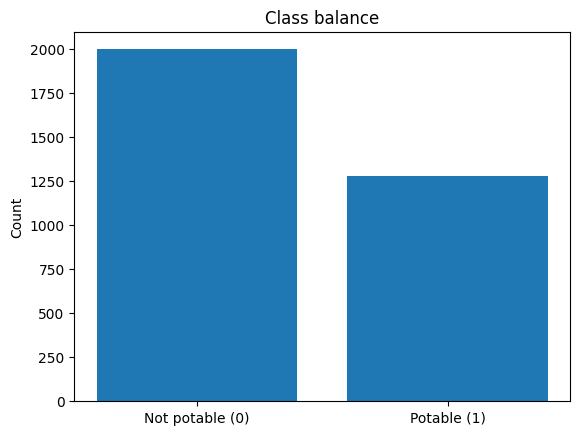

In [4]:
target_counts = df["Potability"].value_counts().sort_index()
plt.figure()
plt.bar(["Not potable (0)", "Potable (1)"], target_counts.values)
plt.title("Class balance")
plt.ylabel("Count")
plt.show()

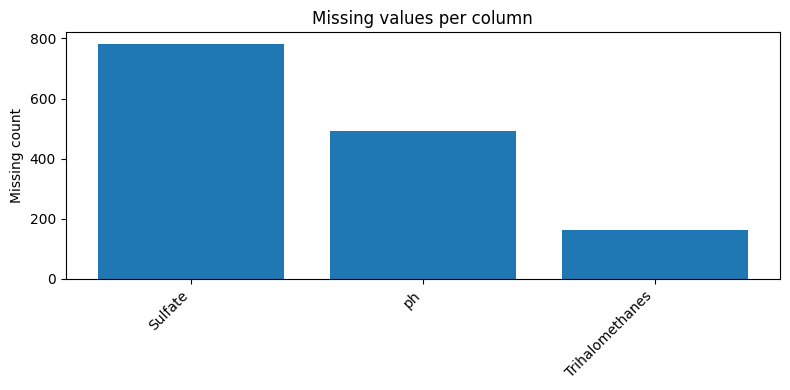

In [5]:
import numpy as np

na_count = df.isna().sum().sort_values(ascending=False)
na_count = na_count[na_count > 0]


plt.figure(figsize=(8, 4))
plt.bar(na_count.index, na_count.values)
plt.title("Missing values per column")
plt.ylabel("Missing count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


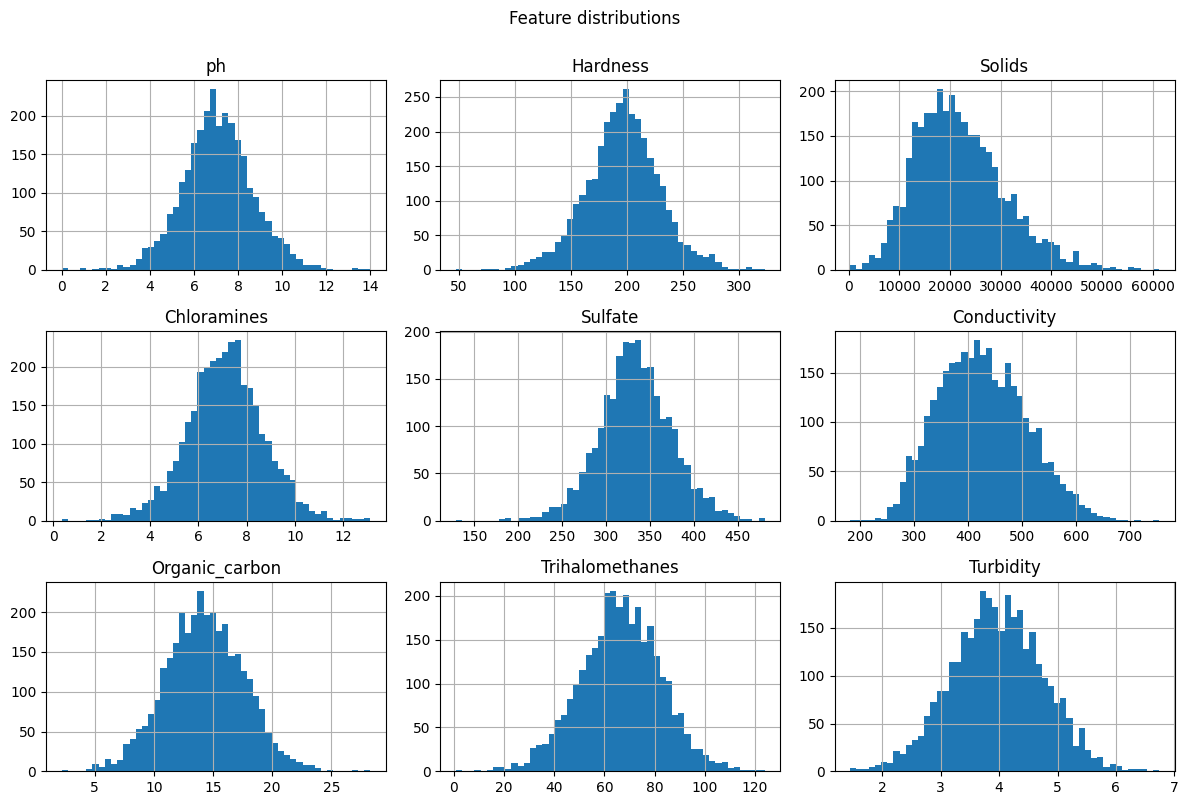

In [6]:
#histograms
features = [c for c in df.columns if c != "Potability"]

df[features].hist(bins=50, figsize=(12,8))
plt.suptitle("Feature distributions", y=1)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

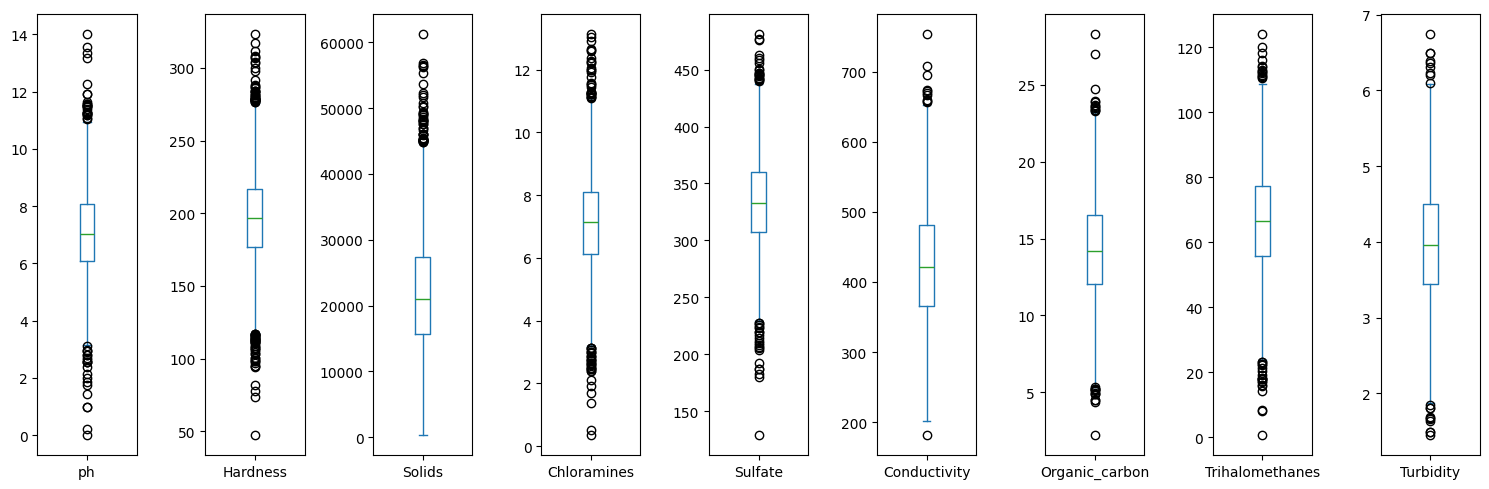

In [7]:
#boxplots

plt.figure(figsize=(12,8))
df[features].plot(kind='box', subplots=True, sharey=False, figsize=(15, 5))
plt.tight_layout()
plt.show()

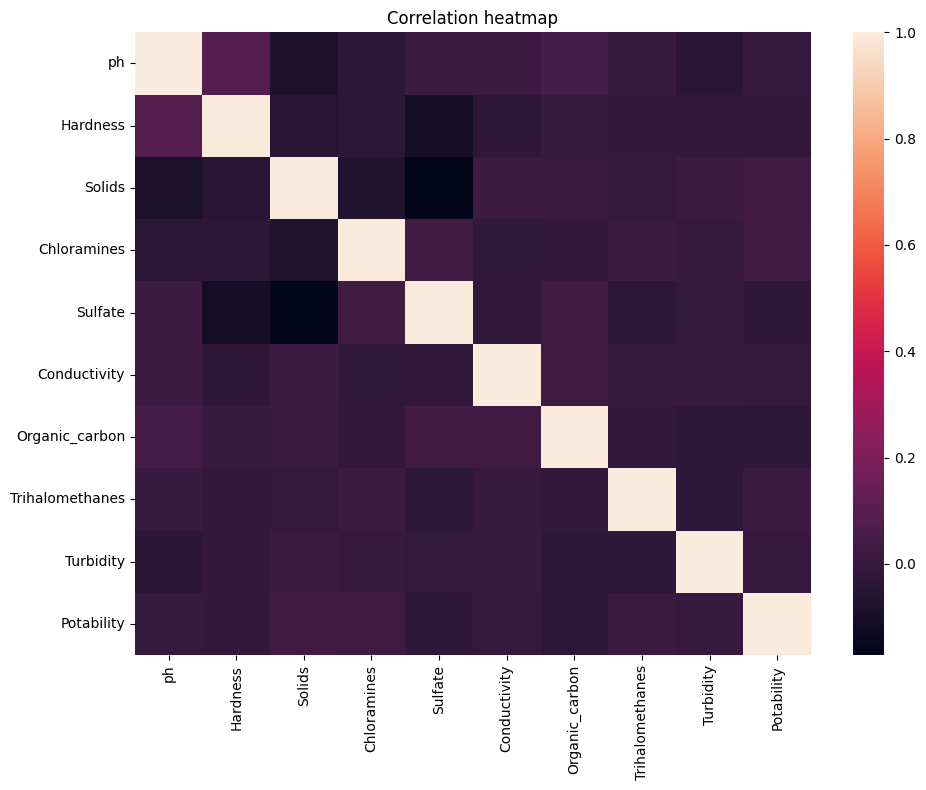

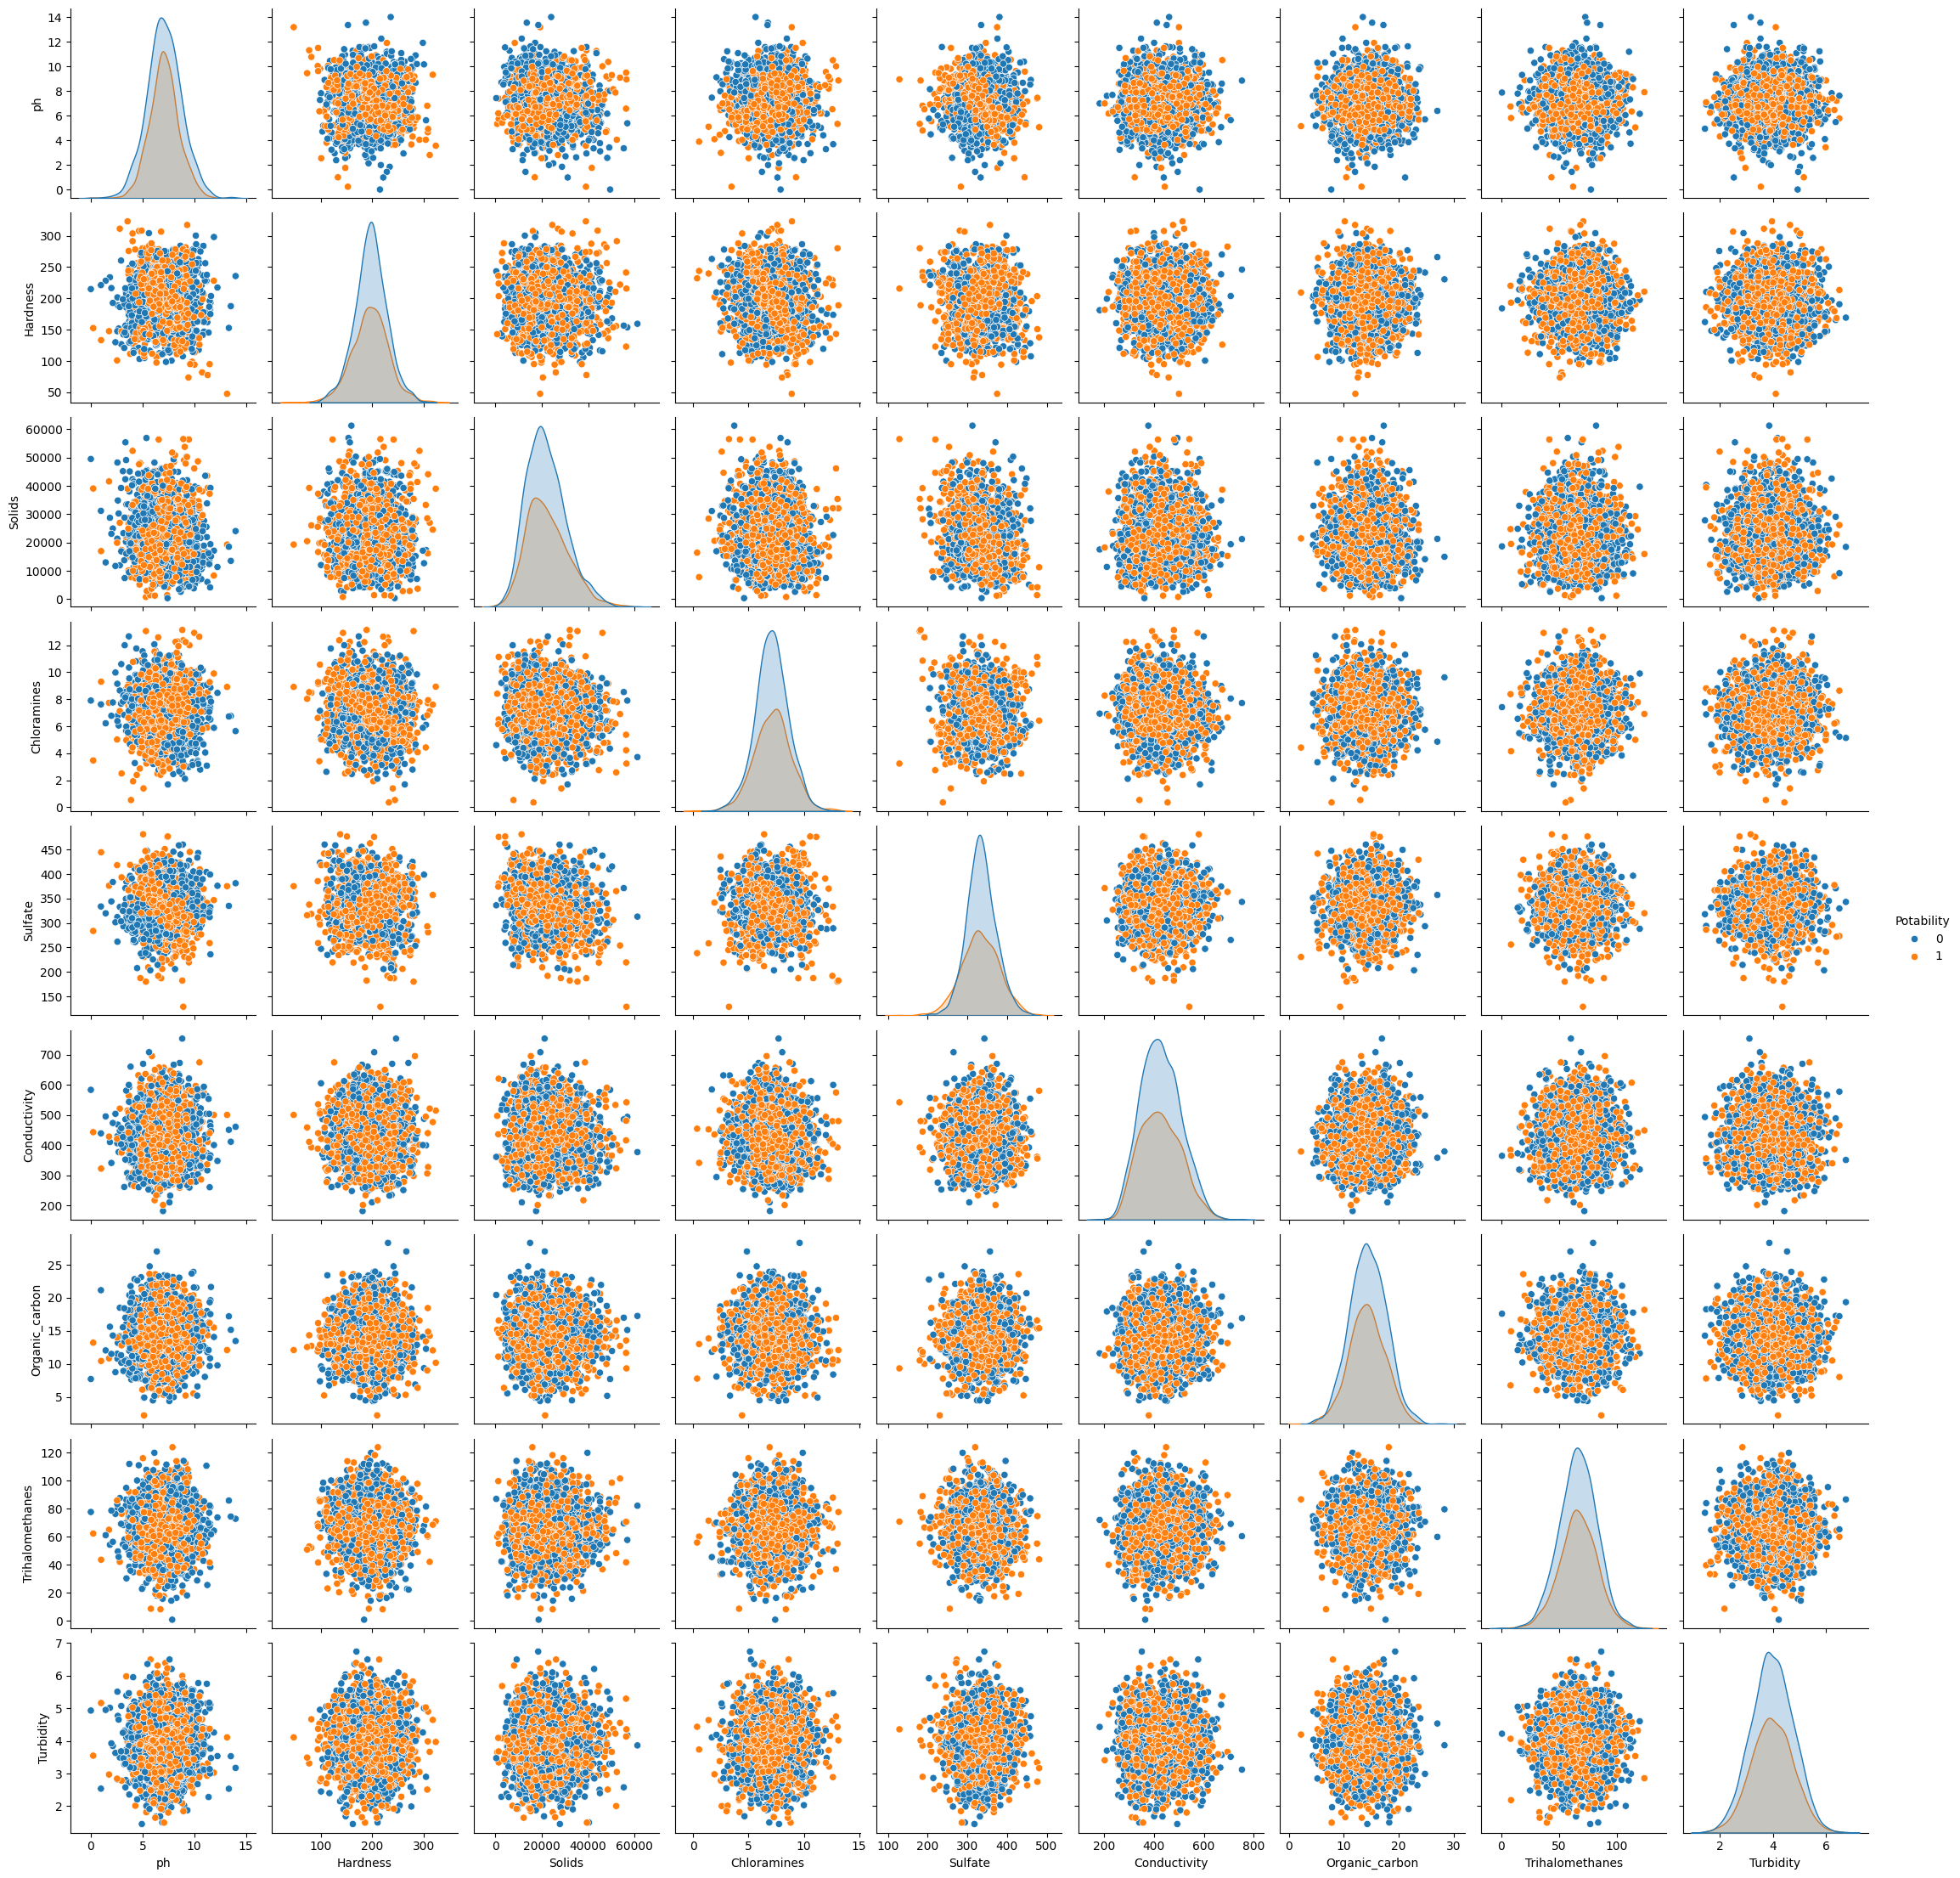

In [13]:
import seaborn as sb
plt.figure(figsize=(10, 8))
sb.heatmap(df[features + ["Potability"]].corr(), annot=False)
plt.title("Correlation heatmap")
plt.tight_layout()
plt.show()

import seaborn as sns

sns.pairplot(df, hue = 'Potability');

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

X = df.drop("Potability", axis=1)
y = df["Potability"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

num_features = X.columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
     ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", RobustScaler())
        ]), num_features)
    ],
    remainder="drop"
)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



models = {
    "LogReg": LogisticRegression(),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "DecisionTree": DecisionTreeClassifier()
}

pipelines = {
    name: Pipeline(steps=[("prep", preprocess), ("model", model)])
    for name, model in models.items()
}


In [ ]:

from sklearn.metrics import classification_report




for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)

    print(f"\n=== {name} ===")
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))



=== LogReg ===
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656


=== SVM ===
              precision    recall  f1-score   support

           0       0.67      0.92      0.77       400
           1       0.68      0.29      0.40       256

    accuracy                           0.67       656
   macro avg       0.67      0.60      0.59       656
weighted avg       0.67      0.67      0.63       656



c:\Users\Fiki\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Fiki\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Fiki\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag


=== RandomForest ===
              precision    recall  f1-score   support

           0       0.67      0.89      0.77       400
           1       0.65      0.32      0.43       256

    accuracy                           0.67       656
   macro avg       0.66      0.60      0.60       656
weighted avg       0.66      0.67      0.63       656


=== GradientBoosting ===
              precision    recall  f1-score   support

           0       0.65      0.91      0.76       400
           1       0.64      0.25      0.36       256

    accuracy                           0.65       656
   macro avg       0.65      0.58      0.56       656
weighted avg       0.65      0.65      0.60       656


=== KNN ===
              precision    recall  f1-score   support

           0       0.65      0.80      0.72       400
           1       0.51      0.32      0.40       256

    accuracy                           0.61       656
   macro avg       0.58      0.56      0.56       656
weighted avg 

In [19]:
# notes
#do cross validation
#keep to one split truought the whole exxperiment
#procentulano outliers do the math analysis (look it up)
#stratified split , keep the class raspodelu ocuvanu

#models tuned

param_grid = {
    "n_estimators": [200, 400, 600],
    "max_depth": [None, 8, 12, 16],
    "min_samples_leaf": [1, 5, 10],
    "max_features": ["sqrt", "log2"]
}

rf_search = GridSearchCV(
    RandomForestClassifier(),
    param_grid,
    scoring="accuracy",   
    cv=5,
    n_jobs=-1
)

models = {
    "LogReg": LogisticRegression(max_iter=3000, class_weight="balanced"),
    "SVM": SVC(class_weight="balanced",C=1.0,gamma="scale", probability=True),
    "RandomForest": rf_search,
    "GradientBoosting": GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ),
    "KNN": KNeighborsClassifier(n_neighbors=15, weights="distance")
}

pipelines = {
    name: Pipeline(steps=[("prep", preprocess), ("model", model)])
    for name, model in models.items()
}



for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)

    print(f"\n=== {name} ===")
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))


=== LogReg ===
              precision    recall  f1-score   support

           0       0.63      0.52      0.57       400
           1       0.41      0.53      0.47       256

    accuracy                           0.52       656
   macro avg       0.52      0.53      0.52       656
weighted avg       0.55      0.52      0.53       656


=== SVM ===
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       400
           1       0.51      0.49      0.50       256

    accuracy                           0.62       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.62      0.62      0.62       656


=== RandomForest ===
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       400
           1       0.67      0.32      0.43       256

    accuracy                           0.67       656
   macro avg       0.67      0.61      0.60       656
weighted avg       0.67